In [1]:
using Revise
includet("../src/AeroMDAO.jl")
includet("../src/math_tools.jl")
includet("../src/FoilParametrization.jl")

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1278


In [2]:
using StaticArrays
using .FoilParametrization: read_foil, foil_camthick, camthick_foil, cosine_foil, kulfan_CST, naca4
using .AeroMDAO
using .math_tools: linspace, tuparray, tupvector
using DelimitedFiles
using Rotations

In [3]:
## Wing section setup
alpha_u = [0.1, 0.3, 0.2, 0.15, 0.2]
alpha_l = [-0.1, -0.1, -0.1, -0.001, -0.02]
alphas = [alpha_u alpha_l]
dzs = (1e-4, 1e-4)
cst_foil = kulfan_CST(alphas, dzs, 0.2)

num_secs = 3
foils = [ cst_foil for i in 1:num_secs ]
airfoils = Foil.(foils)

wing_chords = [1, 0.5, 0.1]
wing_twists = [4, 2, -2]
wing_spans = [2, 0.5]
wing_dihedrals = [0, 30]
wing_sweeps = [15, 60]

wing_right = HalfWing(airfoils, wing_chords, wing_spans, wing_dihedrals, wing_sweeps, wing_twists)
wing = Wing(wing_right, wing_right)
print_info(wing)

Span: 4.340928300532071 m
Area: 2.9672908678269345 m²
MAC: 0.761111111111111 m
Aspect Ratio: 6.35045883592808


In [4]:
## Assembly
ρ = 1.225
uniform = Uniform(10.0, 5.0, -3.0)
@time horseshoe_panels, horseshoes, Γs = solve_case(wing, uniform, span_num = 15, chord_num = 5);

Total Force: [11.110940742812707, -0.3509443960262783, 129.18405659764676] N
Total Moment: [5.5100529197693895, -25.336993150964027, -35.50865494392473] N-m
Lift Coefficient (CL): 0.7107922844786885
Drag Coefficient (CDi): 0.12258182765711136
Side Force Coefficient (CY): -0.0019309547597923622
Lift-to-Drag Ratio (L/D): 5.798512700160848
Rolling Moment Coefficient (Cl): 0.006984043637963652
Pitching Moment Coefficient (Cm): -0.1831642866675298
Yawing Moment Coefficient (Cn): -0.04500755242549345
  7.690135 seconds (26.86 M allocations: 1.438 GiB, 7.37% gc time)


In [5]:
## Panel method: TO DO
camber_panels = mesh_cambers(wing, span_num = 5, chord_num = 10)
wing_panels = mesh_wing(wing, span_num = 5, chord_num = 10);

In [6]:
using Plots, LaTeXStrings

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [7]:
plotlyjs()

┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1278


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1495925479343469571\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7942196061786953238\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1495925479343469571\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.PlotlyJSBackend()

In [8]:
wing_coords = plot_panels(wing_panels)[:]
horseshoe_coords = plot_panels(horseshoe_panels)[:]
streams = plot_streamlines.(streamlines(uniform, horseshoe_panels, horseshoes, Γs, 5, 100));

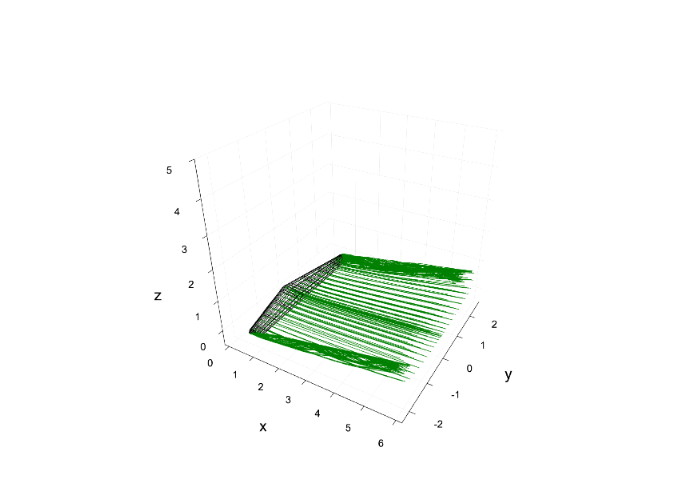

In [9]:
plot(xaxis = "x", yaxis = "y", zaxis = "z", aspect = :equal, zlim = (-0.5, 5.0), size=(1280, 720))
plot!.(wing_coords, color = :black, label = :none)
plot!.(horseshoe_coords, color = :grey, label = :none)
plot!.(streams, color = :green, label = :none)

gui();